# <center>Supervised learning: Classification</center>

<b>DESCRIPTION</b>

    You are supposed to detect whether the person is running or walking based on the sensor data collected from iOS device. The dataset contains a single file which represents sensor data samples collected from accelerometer and gyroscope from iPhone 5c in 10 seconds interval and ~5.4/second frequency.

<b>Objective:</b> Practice classification based on Naive Bayes algorithm. Identify the predictors that can be influential.

<b>Actions to Perform:</b>
    
<ol>
    <li>Load the kinematics dataset as measured on mobile sensors from the file “run_or_walk.csv.”</li>
    <li>List the columns in the dataset.</li>
    <li>Let the target variable “y” be the activity, and assign all the columns after it to “x.”</li>
    <li>Using Scikit-learn, fit a Gaussian Naive Bayes model and observe the accuracy.</li>
    <li>Generate a classification report using Scikit-learn.</li>
    <li>Repeat the model once using only the acceleration values as predictors and then using only the gyro values as predictors.</li>
    <li>Comment on the difference in accuracy between both models.</li>
</ol>

***

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load dataset

In [2]:
df = pd.read_csv("run_or_walk.csv")
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [3]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [5]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [6]:
df.shape

(88588, 11)

In [7]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [8]:
df.duplicated().sum()

0

<AxesSubplot:>

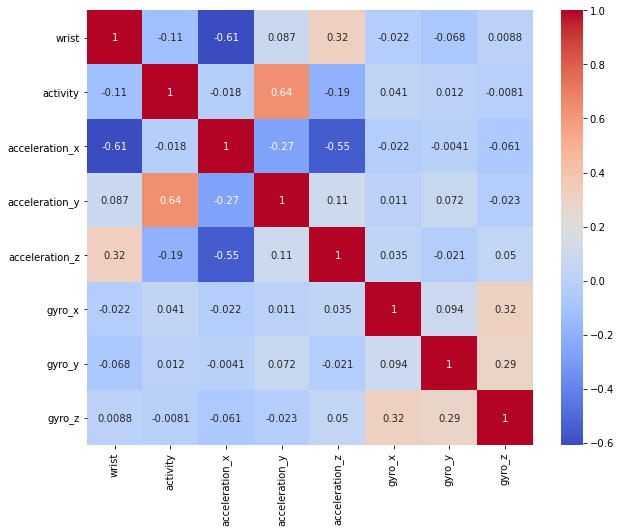

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## <center>Building model for all the features</center>

### Splitting train test set

In [10]:
y = df.iloc[:, 4]
x = df.iloc[:, 5:]

In [11]:
x.columns

Index(['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x',
       'gyro_y', 'gyro_z'],
      dtype='object')

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Building the model

In [13]:
# Initializing the model
regressor = GaussianNB()

# Training the model on train dataset
model = regressor.fit(X_train, Y_train)

# Predicting the values
y_pred = model.predict(X_test)

In [14]:
# Calculating the accuracy
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9562779847236332

In [15]:
print(classification_report(Y_test, y_pred, target_names=['Walk', 'Run']))

              precision    recall  f1-score   support

        Walk       0.93      0.99      0.96     13238
         Run       0.99      0.92      0.95     13339

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



<AxesSubplot:>

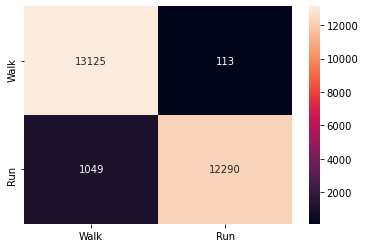

In [16]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['Walk','Run'], yticklabels=['Walk','Run'], annot=True, fmt = '.5g')

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [18]:
dt = DecisionTreeClassifier()

dt_model = dt.fit(X_train, Y_train)

y_pre = dt_model.predict(X_test)

In [19]:
accuracy_score(Y_test, y_pre)

0.9827670542198141

In [20]:
dt_model.get_depth()

34

In [21]:
dt_model.feature_importances_

array([0.04659494, 0.53591649, 0.34293368, 0.01922373, 0.01119913,
       0.04413204])

In [22]:
print(classification_report(Y_test, y_pre, target_names=['Walk', 'Run']))

              precision    recall  f1-score   support

        Walk       0.98      0.98      0.98     13238
         Run       0.98      0.98      0.98     13339

    accuracy                           0.98     26577
   macro avg       0.98      0.98      0.98     26577
weighted avg       0.98      0.98      0.98     26577



<AxesSubplot:>

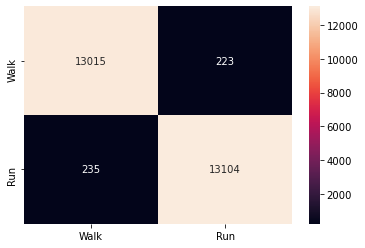

In [23]:
sns.heatmap(confusion_matrix(Y_test, y_pre), xticklabels=['Walk','Run'], yticklabels=['Walk','Run'], annot=True, fmt = '.5g')

## <center>Building model for only acceleration</center>

### Splitting train test set

In [24]:
y = df.iloc[:, 4]
x = df.iloc[:, 5:8]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [25]:
x.columns

Index(['acceleration_x', 'acceleration_y', 'acceleration_z'], dtype='object')

### Building the model

In [26]:
# Initializing the model
regressor = GaussianNB()

# Training the model on train dataset
model = regressor.fit(X_train, Y_train)

# Predicting the values
y_pred = model.predict(X_test)

In [27]:
# Calculating the accuracy
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9570681416262181

In [28]:
print(classification_report(Y_test, y_pred, target_names=['Walk', 'Run']))

              precision    recall  f1-score   support

        Walk       0.93      0.99      0.96     13238
         Run       0.99      0.92      0.96     13339

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



<AxesSubplot:>

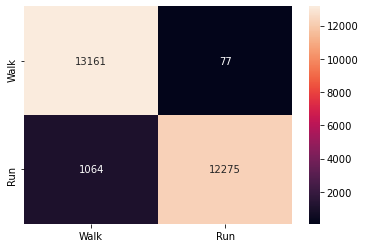

In [29]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['Walk','Run'], yticklabels=['Walk','Run'], annot=True, fmt = '.5g')

## <center>Building model for only gyro</center>

### Splitting train test set

In [30]:
y = df.iloc[:, 4]
x = df.iloc[:, 8:11]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [31]:
x.columns

Index(['gyro_x', 'gyro_y', 'gyro_z'], dtype='object')

### Building the model

In [32]:
# Initializing the model
regressor = GaussianNB()

# Training the model on train dataset
model = regressor.fit(X_train, Y_train)

# Predicting the values
y_pred = model.predict(X_test)

In [33]:
# Calculating the accuracy
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.6471008766978967

In [34]:
print(classification_report(Y_test, y_pred, target_names=['Walk', 'Run']))

              precision    recall  f1-score   support

        Walk       0.62      0.75      0.68     13238
         Run       0.69      0.55      0.61     13339

    accuracy                           0.65     26577
   macro avg       0.65      0.65      0.64     26577
weighted avg       0.65      0.65      0.64     26577



<AxesSubplot:>

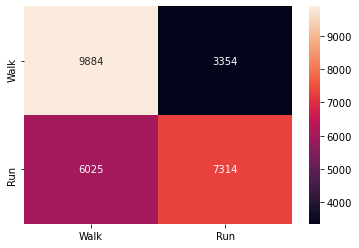

In [35]:
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=['Walk','Run'], yticklabels=['Walk','Run'], annot=True, fmt = '.5g')

The reports above show that the prediction of the activity is solely dependent on the acceleration values thus providing an accuracy of 96%